# Twitter and Reddit Sentimental analysis

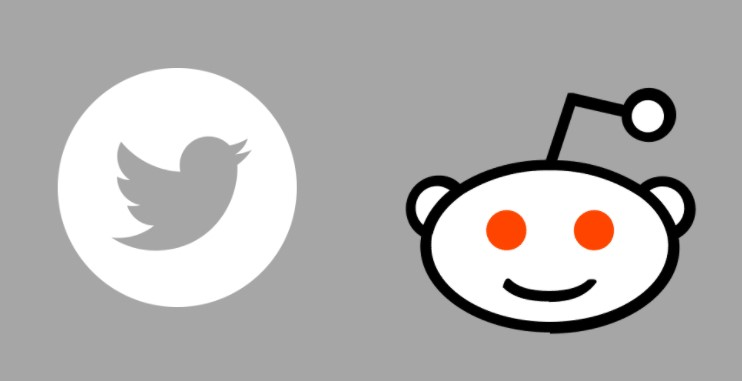


## Context

There two datasets Respectively one Consists of Tweets from Twitter with Sentimental Label and the other from Reddit which Consists of Comments with its Sentimental Label.

  1. Twitter Dataset
  2. Reddit Dataset

All these Tweets and Comments were extracted using there Respective Apis Tweepy and PRAW.
These tweets and Comments Were Made on Narendra Modi and Other Leaders as well as Peoples Opinion Towards the Next Prime Minister of The Nation ( In Context with General Elections Held In India - 2019).
All the Tweets and Comments From twitter and Reddit are Cleaned using Pythons re and also NLP with a Sentimental Label to each ranging from -1 to 1.

          1.  0 Indicating it is a Neutral Tweet/Comment
          2.  1 Indicating a Postive Sentiment
          3. -1 Indicating a Negative Tweet/Comment
          

## Content

* Twitter.csv Dataset has around 163K Tweets along with Sentiment Labels.
* Reddit.csv Dataset has around 37K Comments along with its Sentimental Label

So Generally Each Dataset has two columns, the first column has the cleaned tweets and Comments and the Second one indicates its Sentimental Label


## Data Source

https://www.kaggle.com/cosmos98/twitter-and-reddit-sentimental-analysis-dataset

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from bs4 import BeautifulSoup
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
import string
from nltk.corpus import stopwords 
from textblob import TextBlob
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [2]:
reddit  = pd.read_csv("Reddit_Data.csv")

In [3]:
reddit.head()

clean_comment  category
0   family mormon have never tried explain them t...         1
1  buddhism has very much lot compatible with chr...         1
2  seriously don say thing first all they won get...        -1
3  what you have learned yours and only yours wha...         0
4  for your own benefit you may want read living ...         1

In [4]:
print('Reddit Data Shape  :', reddit.shape)

Reddit Data Shape  : (37249, 2)


In [5]:
reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [6]:
reddit['category'].value_counts()

 1    15830
 0    13142
-1     8277
Name: category, dtype: int64

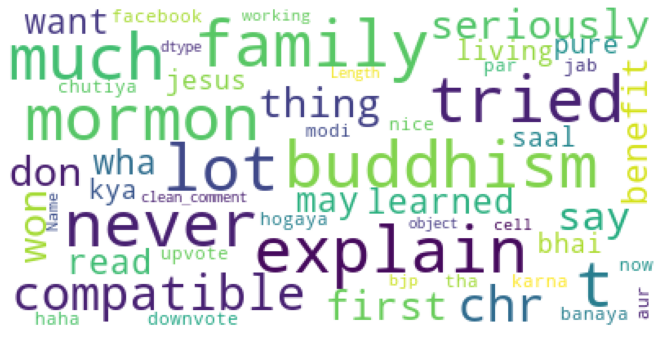

In [7]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 162980, max_font_size = 40, scale = 1, 
                          random_state = 42).generate(str(data))

    fig = plt.figure(1, figsize = (20,6))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reddit['clean_comment'])

In [8]:
reddit['clean_comment'] = reddit['clean_comment'].astype("str").astype("string")

In [9]:
reddit['clean_comment'][0]

' family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches '

## PreProcessing of Text

### Text Normalization

### Removing Html Strips & Noise Text

In [10]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()


#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)


#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Apply function on review column
reddit['cleaned_comment'] = reddit['clean_comment'].apply(denoise_text)

In [11]:
reddit.head()

clean_comment  category  \
0   family mormon have never tried explain them t...         1   
1  buddhism has very much lot compatible with chr...         1   
2  seriously don say thing first all they won get...        -1   
3  what you have learned yours and only yours wha...         0   
4  for your own benefit you may want read living ...         1   

                                     cleaned_comment  
0   family mormon have never tried explain them t...  
1  buddhism has very much lot compatible with chr...  
2  seriously don say thing first all they won get...  
3  what you have learned yours and only yours wha...  
4  for your own benefit you may want read living ...

### Removing Special Characters

In [12]:
def remove_special_characters(text, remove_digits = True):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

#Apply function on review column
reddit['cleaned_comment'] = reddit['cleaned_comment'].apply(remove_special_characters)

In [13]:
reddit.head()

clean_comment  category  \
0   family mormon have never tried explain them t...         1   
1  buddhism has very much lot compatible with chr...         1   
2  seriously don say thing first all they won get...        -1   
3  what you have learned yours and only yours wha...         0   
4  for your own benefit you may want read living ...         1   

                                     cleaned_comment  
0   family mormon have never tried explain them t...  
1  buddhism has very much lot compatible with chr...  
2  seriously don say thing first all they won get...  
3  what you have learned yours and only yours wha...  
4  for your own benefit you may want read living ...

### Tokenization

In [14]:
tokenizer = ToktokTokenizer()

stopword_list = nltk.corpus.stopwords.words('english')

### Stemming

In [15]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

reddit['cleaned_comment'] = reddit['cleaned_comment'].apply(simple_stemmer)

In [16]:
reddit.head()

clean_comment  category  \
0   family mormon have never tried explain them t...         1   
1  buddhism has very much lot compatible with chr...         1   
2  seriously don say thing first all they won get...        -1   
3  what you have learned yours and only yours wha...         0   
4  for your own benefit you may want read living ...         1   

                                     cleaned_comment  
0  famili mormon have never tri explain them they...  
1  buddhism ha veri much lot compat with christia...  
2  serious don say thing first all they won get i...  
3  what you have learn your and onli your what yo...  
4  for your own benefit you may want read live bu...

### Removing Stopwords

In [17]:
stop = set(stopwords.words('english'))

def remove_stopwords(text, is_lower_case = False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


reddit['cleaned_comment'] = reddit['cleaned_comment'].apply(remove_stopwords)

In [18]:
reddit.head()

clean_comment  category  \
0   family mormon have never tried explain them t...         1   
1  buddhism has very much lot compatible with chr...         1   
2  seriously don say thing first all they won get...        -1   
3  what you have learned yours and only yours wha...         0   
4  for your own benefit you may want read living ...         1   

                                     cleaned_comment  
0  famili mormon never tri explain still stare pu...  
1  buddhism ha veri much lot compat christian esp...  
2  serious say thing first get complex explain no...  
3  learn onli want teach differ focu goal wrap pa...  
4  benefit may want read live buddha live christ ...

### Lemmatisation

In [19]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer  = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

reddit['cleaned_comment'] = reddit['cleaned_comment'].apply(lemmatize_text)

In [20]:
reddit.head()

clean_comment  category  \
0   family mormon have never tried explain them t...         1   
1  buddhism has very much lot compatible with chr...         1   
2  seriously don say thing first all they won get...        -1   
3  what you have learned yours and only yours wha...         0   
4  for your own benefit you may want read living ...         1   

                                     cleaned_comment  
0  [famili, mormon, never, tri, explain, still, s...  
1  [buddhism, ha, veri, much, lot, compat, christ...  
2  [serious, say, thing, first, get, complex, exp...  
3  [learn, onli, want, teach, differ, focu, goal,...  
4  [benefit, may, want, read, live, buddha, live,...

In [21]:
reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   clean_comment    37249 non-null  string
 1   category         37249 non-null  int64 
 2   cleaned_comment  37249 non-null  object
dtypes: int64(1), object(1), string(1)
memory usage: 873.1+ KB


In [22]:
reddit['cleaned_comment'] = reddit['cleaned_comment'].astype("str").astype("string")

### Polarity

In [23]:
reddit['sentiment'] = reddit['cleaned_comment'].apply(lambda x: TextBlob(x).sentiment.polarity)
reddit.head()

clean_comment  category  \
0   family mormon have never tried explain them t...         1   
1  buddhism has very much lot compatible with chr...         1   
2  seriously don say thing first all they won get...        -1   
3  what you have learned yours and only yours wha...         0   
4  for your own benefit you may want read living ...         1   

                                     cleaned_comment  sentiment  
0  ['famili', 'mormon', 'never', 'tri', 'explain'...   0.450000  
1  ['buddhism', 'ha', 'veri', 'much', 'lot', 'com...   0.049036  
2  ['serious', 'say', 'thing', 'first', 'get', 'c...  -0.122222  
3  ['learn', 'onli', 'want', 'teach', 'differ', '...   0.000000  
4  ['benefit', 'may', 'want', 'read', 'live', 'bu...  -0.019091

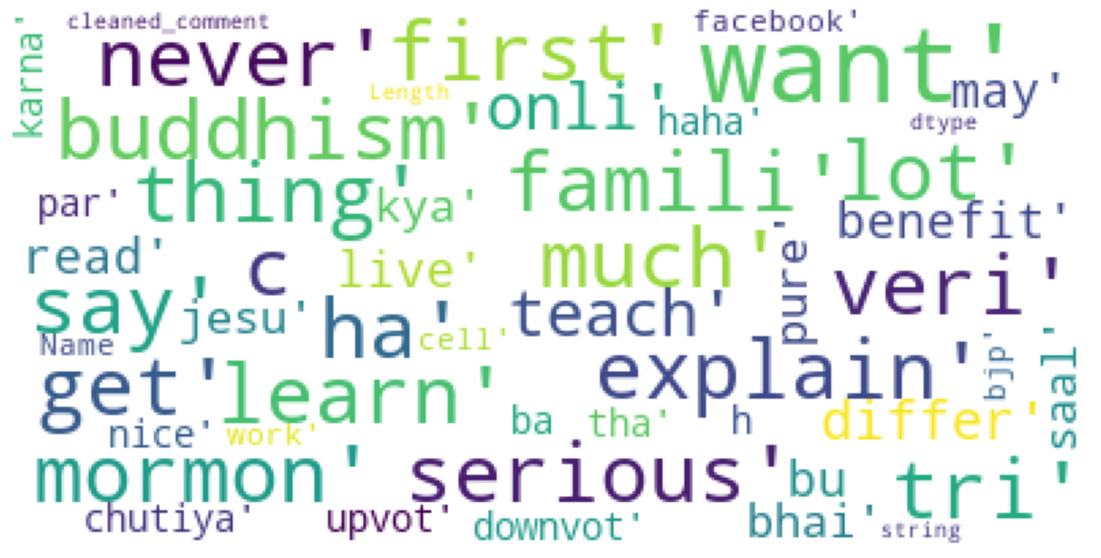

In [24]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 16000, max_font_size = 40, scale = 1, 
                          random_state = 42).generate(str(data))

    fig = plt.figure(1, figsize = (20,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reddit['cleaned_comment'])

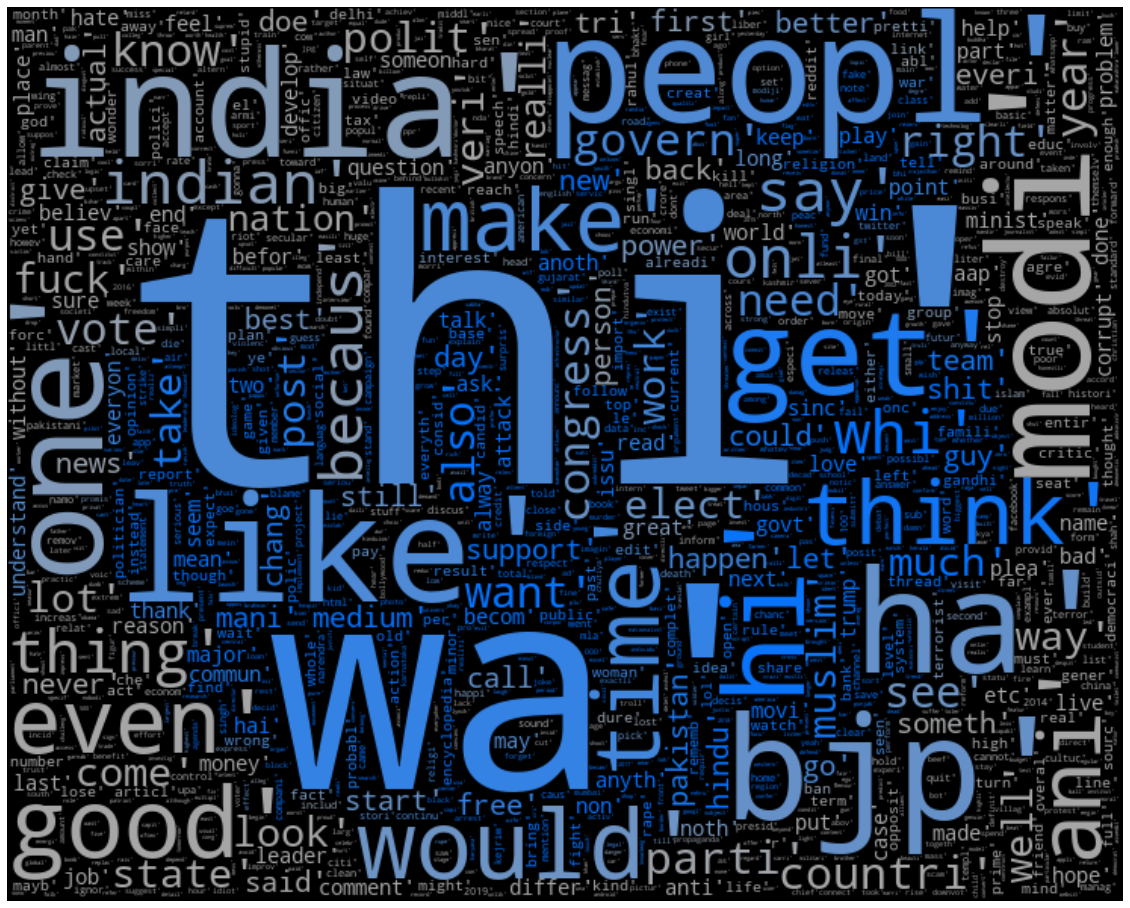

In [25]:
stopwords = set(STOPWORDS)
mask = np.array(Image.open(r"D:\Projects\Twitter and Reddit Sentimental analysis Dataset\06.JPG"))
wordcloud = WordCloud(width = 3000, height = 2000, random_state = 1, background_color = 'black', colormap = 'Set2', 
                      collocations = False, mode = "RGBA", max_words = 4000, 
                      mask = mask).generate(' '.join(reddit['cleaned_comment']))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize = [20,20])
plt.imshow(wordcloud.recolor(color_func = image_colors), interpolation = "bilinear")
plt.axis("off") 
plt.show()

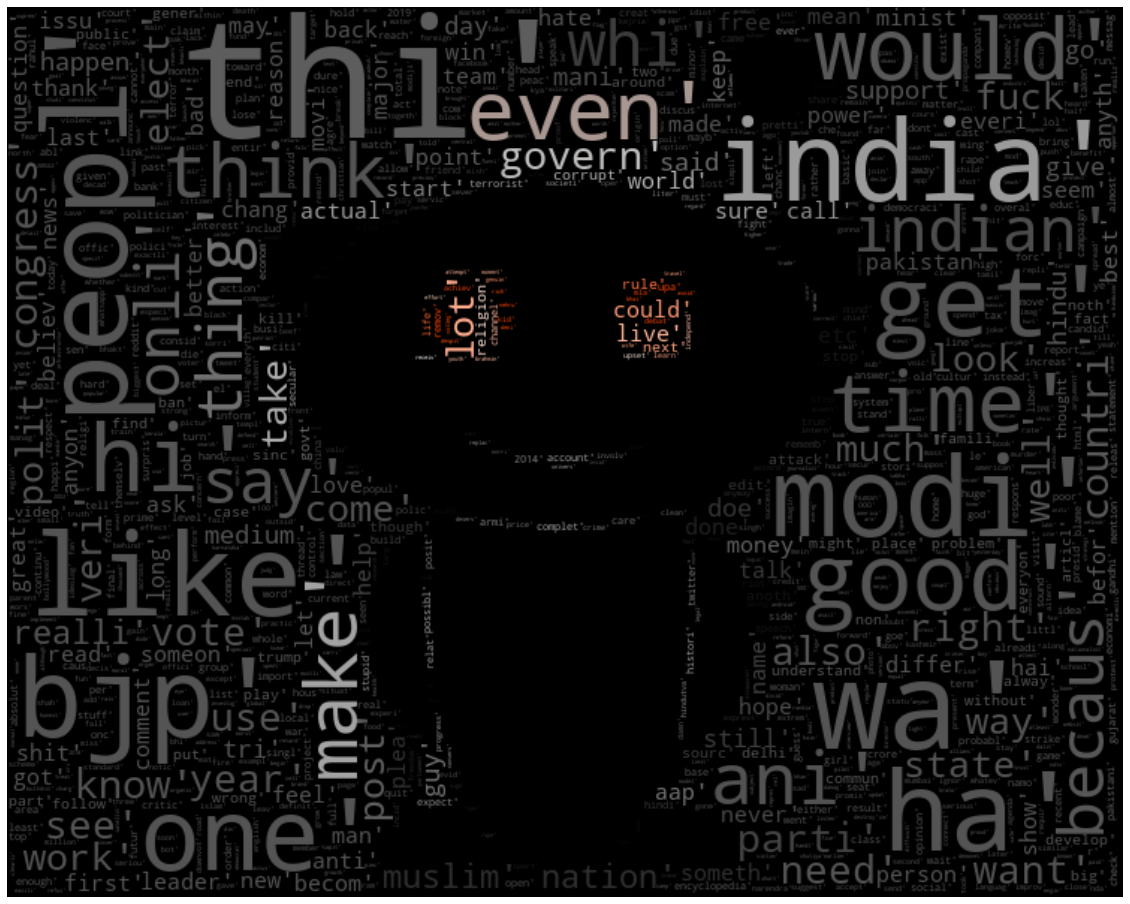

In [26]:
stopwords = set(STOPWORDS)
mask = np.array(Image.open(r"D:\Projects\Twitter and Reddit Sentimental analysis Dataset\07.JPG"))
wordcloud = WordCloud(width = 3000, height = 2000, random_state = 1, background_color = 'black', colormap = 'Set2', 
                      collocations = False, mode = "RGBA", max_words = 4000, 
                      mask = mask).generate(' '.join(reddit['cleaned_comment']))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize = [20,20])
plt.imshow(wordcloud.recolor(color_func = image_colors), interpolation = "bilinear")
plt.axis("off") 
plt.show()

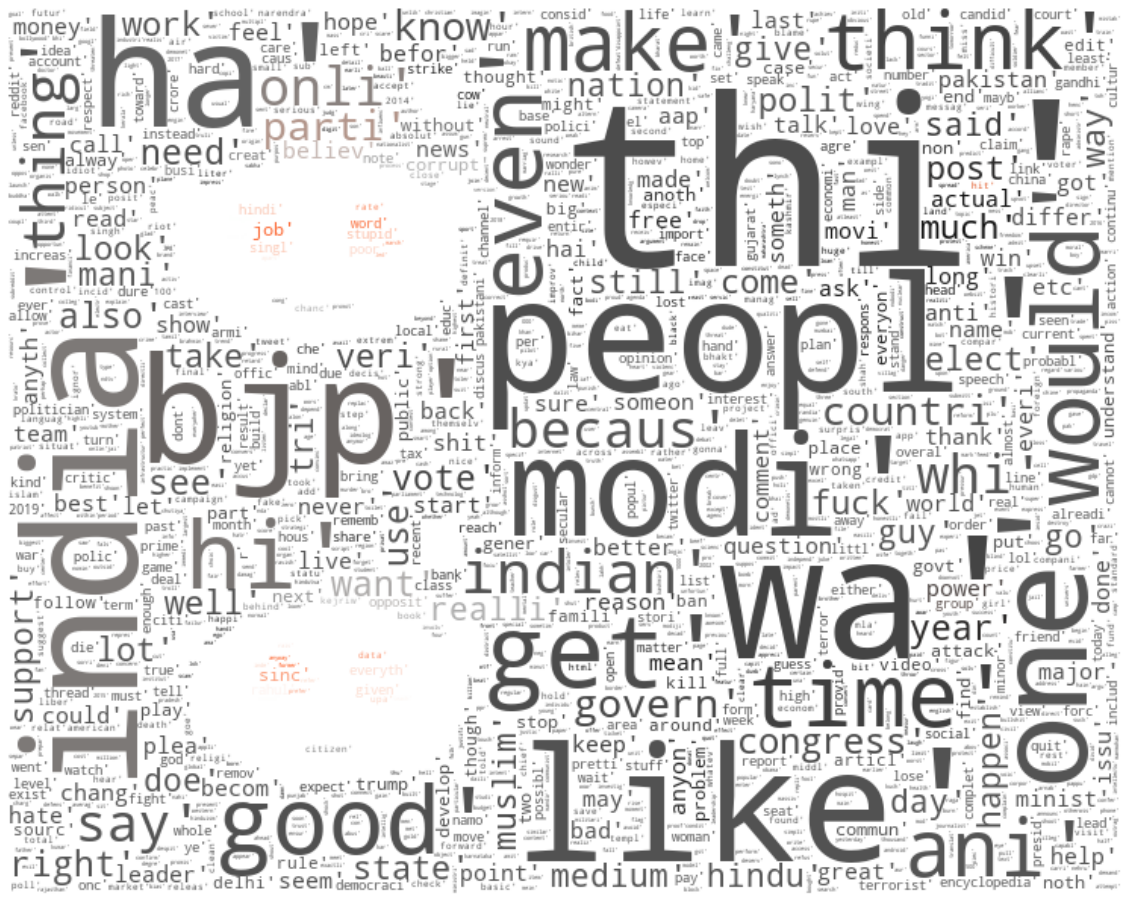

In [27]:
stopwords = set(STOPWORDS)
mask = np.array(Image.open(r"D:\Projects\Twitter and Reddit Sentimental analysis Dataset\08.JPG"))
wordcloud = WordCloud(width = 3000, height = 2000, random_state = 1, background_color = 'white', colormap = 'Set2', 
                      collocations = False, mode = "RGBA", max_words = 4000, 
                      mask = mask).generate(' '.join(reddit['cleaned_comment']))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize = [20,20])
plt.imshow(wordcloud.recolor(color_func = image_colors), interpolation = "bilinear")
plt.axis("off") 
plt.show()

In [28]:
reddit.head()

clean_comment  category  \
0   family mormon have never tried explain them t...         1   
1  buddhism has very much lot compatible with chr...         1   
2  seriously don say thing first all they won get...        -1   
3  what you have learned yours and only yours wha...         0   
4  for your own benefit you may want read living ...         1   

                                     cleaned_comment  sentiment  
0  ['famili', 'mormon', 'never', 'tri', 'explain'...   0.450000  
1  ['buddhism', 'ha', 'veri', 'much', 'lot', 'com...   0.049036  
2  ['serious', 'say', 'thing', 'first', 'get', 'c...  -0.122222  
3  ['learn', 'onli', 'want', 'teach', 'differ', '...   0.000000  
4  ['benefit', 'may', 'want', 'read', 'live', 'bu...  -0.019091

### Count The Negative, Neutral, and Positive Comments

In [29]:
negative_count = [len(reddit[reddit.category == -1])]
neutral_count  = [len(reddit[reddit.category == 0])]
positive_count = [len(reddit[reddit.category == 1])]

x = ['Reddit']
x_indexes = np.arange(len(x))
width = 0.25

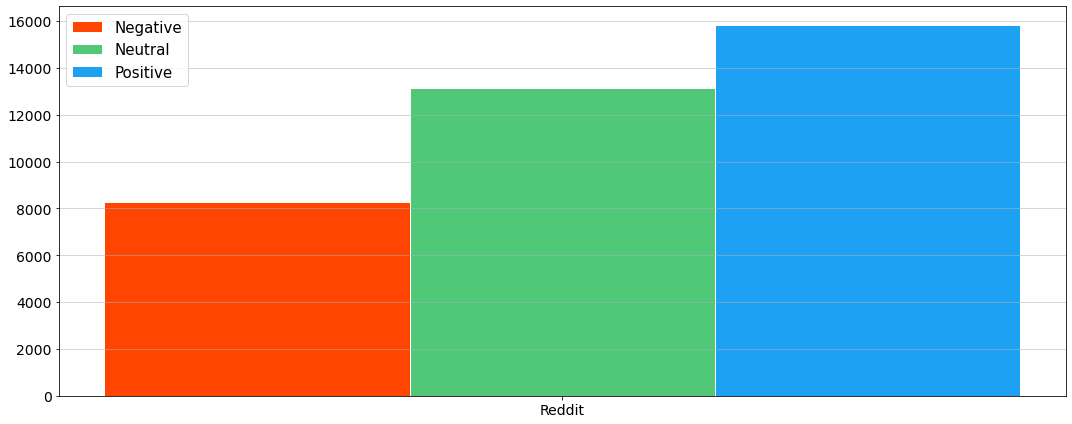

In [30]:
plt.figure(figsize = (15,6))

plt.bar(x_indexes - width, negative_count, width = width, label = 'Negative', edgecolor = 'white', color = '#ff4500')
plt.bar(x_indexes,         neutral_count,  width = width, label = 'Neutral',  edgecolor = 'white', color = '#50C878')
plt.bar(x_indexes + width, positive_count, width = width, label = 'Positive', edgecolor = 'white', color = '#1DA1F2')

plt.yticks(fontsize = 14)
plt.xticks(ticks = x_indexes, labels = x, fontsize = 14)

plt.legend(prop = {'size':15})
plt.grid(axis = 'y', alpha = 0.65)
plt.tight_layout()

### Create Word Clouds to See Which Words Appear Frequently

In [31]:
negative_words = ''
neutral_words  = ''
positive_words = ''

stopwords = set(STOPWORDS)

for comment, category in zip(reddit.cleaned_comment, reddit.category):
    tokens = comment.split()
    
    for word in tokens:
        if category == -1:
            negative_words += word + ' '
        elif category == 0:
            neutral_words += word + ' '
        else:
            positive_words += word + ' '

In [32]:
negative_cloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stopwords, 
                           min_font_size = 10).generate(negative_words)

neutral_cloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stopwords, 
                          min_font_size = 10).generate(neutral_words)

positive_cloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stopwords, 
                           min_font_size = 10).generate(positive_words)

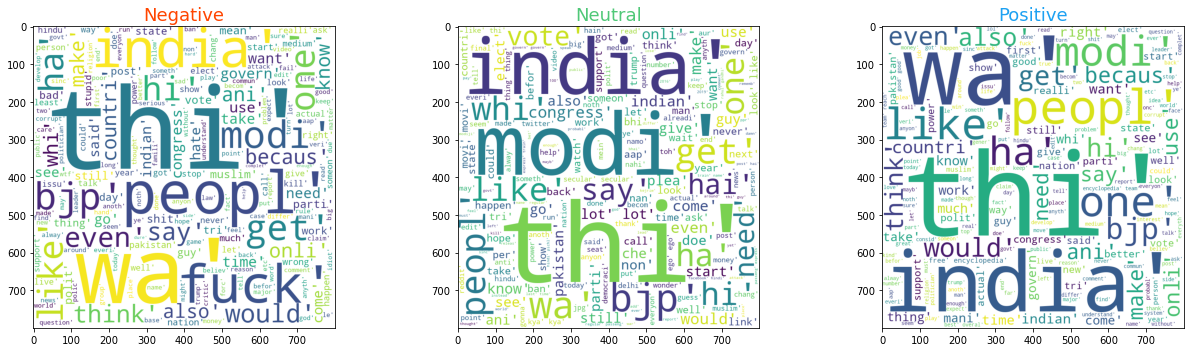

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (18,5), facecolor = None)

ax1.imshow(negative_cloud)
ax1.set_title('Negative', fontsize = 18, color = '#ff4500')

ax2.imshow(neutral_cloud)
ax2.set_title('Neutral', fontsize = 18, color = '#50C878')

ax3.imshow(positive_cloud)
ax3.set_title('Positive', fontsize = 18, color = '#1DA1F2')

plt.tight_layout()

### Split Test & Train Data

* Balance the Data (The Amount of Negative, Neutral, and Positive Data Must be Equivalent)

In [34]:
class Data:
    def __init__(self, df):
        self.df = df
        
    def fixData(self):
        dataframe = self.df
        lowest_len = min([i for i in dataframe.category.value_counts()])
        
        # Create the final data frame
        final_df = pd.concat([dataframe[dataframe.category == -1][:lowest_len],
                             dataframe[dataframe.category  == 0][:lowest_len],
                             dataframe[dataframe.category  == 1][:lowest_len]])
        
        # To shuffle the rows in the data frame
        final_df = final_df.sample(frac = 1).reset_index(drop = True)
        return final_df

In [35]:
a = Data(reddit)
fixed_df = a.fixData()
print(f'Before: \n{reddit.category.value_counts()}\n')
print(f'After : \n{reddit.category.value_counts()}')

Before: 
 1    15830
 0    13142
-1     8277
Name: category, dtype: int64

After : 
 1    15830
 0    13142
-1     8277
Name: category, dtype: int64


In [36]:
train_X, test_X, train_y, test_y = train_test_split([i for i in fixed_df.cleaned_comment], 
                                                    [i for i in fixed_df.category], test_size = 0.25, random_state = 1)

### Vectorize the Comment

In [37]:
vectorizer = TfidfVectorizer()
train_X_vectors = vectorizer.fit_transform(train_X)
test_X_vectors = vectorizer.transform(test_X)

### Creating Models

### Linear SVC

In [38]:
clf_svm = LinearSVC()
clf_svm.fit(train_X_vectors, train_y)
clf_prediction = clf_svm.predict(test_X_vectors)

print(f'Accuracy: {clf_svm.score(test_X_vectors, test_y)}')
print(f'Accuracy: {f1_score(test_y, clf_prediction, average = None, labels = [-1, 0, 1])}')

Accuracy: 0.8205541237113402
Accuracy: [0.79699612 0.85481998 0.80793372]


### MultinomialNB

In [39]:
svm_mnb = MultinomialNB()
svm_mnb.fit(train_X_vectors, train_y)
mnb_prediction = svm_mnb.predict(test_X_vectors)

print(f'Accuracy: {svm_mnb.score(test_X_vectors, test_y)}')
print(f'Accuracy: {f1_score(test_y, mnb_prediction, average = None, labels = [-1, 0, 1])}')

Accuracy: 0.633215206185567
Accuracy: [0.68954688 0.48033708 0.66927593]


### Decision Tree Classifier

In [40]:
svm_dtc = DecisionTreeClassifier()
svm_dtc.fit(train_X_vectors, train_y)
dtc_prediction = svm_dtc.predict(test_X_vectors)

print(f'Accuracy: {svm_dtc.score(test_X_vectors, test_y)}')
print(f'Accuracy: {f1_score(test_y, dtc_prediction, average = None, labels = [-1, 0, 1])}')

Accuracy: 0.7086018041237113
Accuracy: [0.64398542 0.7967366  0.68062827]


### Random Forest Classifier

In [41]:
svm_rfc = RandomForestClassifier()
svm_rfc.fit(train_X_vectors, train_y)
rfc_prediction = svm_rfc.predict(test_X_vectors)

print(f'Accuracy: {svm_rfc.score(test_X_vectors, test_y)}')
print(f'Accuracy: {f1_score(test_y, rfc_prediction, average = None, labels = [-1, 0, 1])}')

Accuracy: 0.7815721649484536
Accuracy: [0.72277992 0.85010083 0.76253687]
